### About this
I think we are just gonna take the data sheet, try to visualize it, try to build a few models, and evaluate them.

In [3]:
import scipy as sp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy

import statsmodels.formula.api as smf
import statsmodels.api as sm

In [9]:
#import the .csv file as a dataframe
df = pd.read_csv('/Users/jeffreyfang/dartdataforfun/archive/CarPrice_Assignment.csv')
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

**First, let's jsut build a simple linear regression model**
<br> let's predict price (y) from horsepower (x)

In [19]:
#first we grab the columns we want, and split data
x = df['horsepower']
y = df['price']

from sklearn.model_selection import train_test_split as tts
y_tr, y_ts, x_tr, x_ts = tts(y, x, test_size = 0.2, random_state = 42)

In [53]:
#let's try to add the intercept
x_train = sm.add_constant(x_tr)
x_test = sm.add_constant(x_ts)

print(x_train)

     const  horsepower
66     1.0          72
111    1.0          95
153    1.0          62
96     1.0          69
38     1.0          86
..     ...         ...
106    1.0         160
14     1.0         121
92     1.0          69
179    1.0         161
102    1.0         152

[164 rows x 2 columns]


In [55]:
#let's train the model

model = sm.OLS(y_tr, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     311.3
Date:                Sun, 16 Jun 2024   Prob (F-statistic):           1.49e-39
Time:                        15:38:23   Log-Likelihood:                -1612.9
No. Observations:                 164   AIC:                             3230.
Df Residuals:                     162   BIC:                             3236.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3126.8699    992.402     -3.151      0.002   -5086.582   -1167.158
horsepower   156.1614      8.851     17.643      0.000     138.683     173.640
==============================================================================
Omnibus:                       46.624   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.539
Skew:                           1.260   Prob(JB):                     1.47e-22
Kurtosis:                       5.891   Cond. No.                         313.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<matplotlib.collections.PathCollection object at 0x15366f110> <matplotlib.collections.PathCollection object at 0x147e37c90>


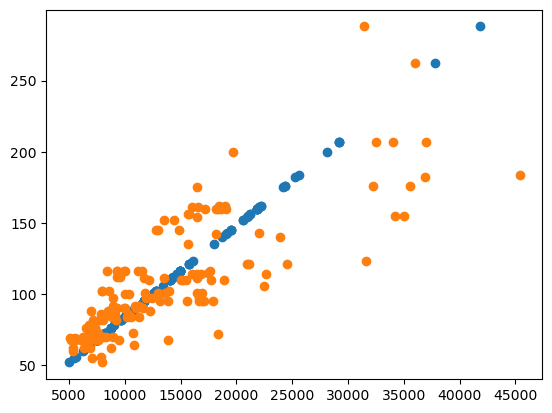

In [67]:
#let's see how prediction works

pred_price = model.predict(x_train)

#remember, you need to use the dataset with added constant, or the DF format won't fit. 
#but then below when you are plotting, you need to use orignial x_tr. it's all about fitting formats

print(plt.scatter(pred_price, x_tr), plt.scatter(y_tr, x_tr))